In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ucihar-dataset/UCI-HAR Dataset/activity_labels.txt
/kaggle/input/ucihar-dataset/UCI-HAR Dataset/README.txt
/kaggle/input/ucihar-dataset/UCI-HAR Dataset/features_info.txt
/kaggle/input/ucihar-dataset/UCI-HAR Dataset/features.txt
/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/subject_test.txt
/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/y_test.txt
/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/X_test.txt
/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/Inertial Signals/body_acc_y_test.txt
/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/Inertial Signals/total_acc_y_test.txt
/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/Inertial Signals/total_acc_z_test.txt
/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/Inertial Signals/body_acc_z_test.txt
/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/Inertial Signals/body_gyro_y_test.txt
/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/Inertial Signals/body_gyro_x_test.txt
/kaggle/input/ucihar-dataset/UCI-HAR Datase

In [3]:
import numpy as np
import pandas as pd

file_paths = ["/kaggle/input/ucihar-dataset/UCI-HAR Dataset/train/Inertial Signals/body_acc_x_train.txt", 
              "/kaggle/input/ucihar-dataset/UCI-HAR Dataset/train/Inertial Signals/body_acc_y_train.txt", 
              "/kaggle/input/ucihar-dataset/UCI-HAR Dataset/train/Inertial Signals/body_acc_z_train.txt", 
              "/kaggle/input/ucihar-dataset/UCI-HAR Dataset/train/Inertial Signals/body_gyro_x_train.txt", 
              "/kaggle/input/ucihar-dataset/UCI-HAR Dataset/train/Inertial Signals/body_gyro_y_train.txt", 
              "/kaggle/input/ucihar-dataset/UCI-HAR Dataset/train/Inertial Signals/body_gyro_z_train.txt", 
              "/kaggle/input/ucihar-dataset/UCI-HAR Dataset/train/Inertial Signals/total_acc_x_train.txt", 
              "/kaggle/input/ucihar-dataset/UCI-HAR Dataset/train/Inertial Signals/total_acc_y_train.txt", 
              "/kaggle/input/ucihar-dataset/UCI-HAR Dataset/train/Inertial Signals/total_acc_z_train.txt"]

with open(file_paths[0], "r") as f:
    num_lines = sum(1 for _ in f)
    
with open(file_paths[0], "r") as f:
    num_columns = len(f.readline().split())

total_columns = num_columns * len(file_paths)

merged_data = np.zeros((num_lines, total_columns), dtype=np.float32)

file_objects = [open(file, "r") for file in file_paths]

for i, lines in enumerate(zip(*file_objects)):  
    row_values = []
    for line in lines:
        row_values.extend(map(float, line.split()))  
    merged_data[i] = row_values 

for f in file_objects:
    f.close()

df = pd.DataFrame(merged_data)
df.to_csv("merged_train.csv", index=False, header=False)

print("Merged Train")

Merged Train


In [4]:
import numpy as np
import pandas as pd

file_paths = ["/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/Inertial Signals/body_acc_x_test.txt", 
              "/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/Inertial Signals/body_acc_y_test.txt", 
              "/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/Inertial Signals/body_acc_z_test.txt", 
              "/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/Inertial Signals/body_gyro_x_test.txt", 
              "/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/Inertial Signals/body_gyro_y_test.txt", 
              "/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/Inertial Signals/body_gyro_z_test.txt", 
              "/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/Inertial Signals/total_acc_x_test.txt", 
              "/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/Inertial Signals/total_acc_y_test.txt", 
              "/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/Inertial Signals/total_acc_z_test.txt"]

with open(file_paths[0], "r") as f:
    num_lines = sum(1 for _ in f)
    
with open(file_paths[0], "r") as f:
    num_columns = len(f.readline().split())

total_columns = num_columns * len(file_paths)

merged_data = np.zeros((num_lines, total_columns), dtype=np.float32)

file_objects = [open(file, "r") for file in file_paths]

for i, lines in enumerate(zip(*file_objects)):  
    row_values = []
    for line in lines:
        row_values.extend(map(float, line.split()))  
    merged_data[i] = row_values 

for f in file_objects:
    f.close()

df = pd.DataFrame(merged_data)
df.to_csv("merged_test.csv", index=False, header=False)

print("Merged test")

Merged test


In [5]:
X_train = pd.read_csv("/kaggle/working/merged_train.csv", header=None)  
X_test = pd.read_csv("/kaggle/working/merged_test.csv", header=None)  
y_train = pd.read_csv("/kaggle/input/ucihar-dataset/UCI-HAR Dataset/train/y_train.txt", header=None)  
y_test = pd.read_csv("/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/y_test.txt", header=None)

In [6]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,...,0.100058,0.098564,0.093177,0.088742,0.090505,0.094843,0.098350,0.100385,0.099874,0.094987
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,...,0.094537,0.098759,0.101977,0.095360,0.089466,0.095126,0.099496,0.093535,0.089035,0.090612
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,...,0.085343,0.087155,0.084546,0.082166,0.081972,0.081413,0.081936,0.083011,0.082334,0.081487
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,...,0.088112,0.087322,0.083738,0.082701,0.084490,0.082785,0.084084,0.085761,0.083275,0.081404
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,...,0.088028,0.090312,0.088713,0.086957,0.086522,0.081640,0.079652,0.081329,0.085397,0.088816


In [7]:
X_train.shape

(7352, 1152)

In [8]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151
0,0.011653,0.013109,0.011269,0.027831,0.002318,-0.018965,-0.061920,-0.094248,-0.079534,-0.070084,...,0.155110,0.153346,0.149289,0.147401,0.146905,0.145261,0.143904,0.144395,0.144703,0.145494
1,0.009280,0.004930,0.003954,0.009214,0.016156,0.014079,0.013105,0.021247,0.026823,0.031054,...,0.133731,0.132851,0.132054,0.132224,0.139767,0.147877,0.153025,0.152788,0.139843,0.121314
2,0.005732,0.007066,0.005110,0.002434,0.002024,0.001382,0.001930,0.004875,0.003776,0.002400,...,0.131392,0.132404,0.134938,0.137589,0.134431,0.133174,0.133712,0.132678,0.132694,0.132117
3,0.000452,0.000604,-0.002485,-0.004562,-0.006002,-0.006382,-0.005276,-0.001489,0.005153,0.004951,...,0.126040,0.124815,0.125353,0.126463,0.121757,0.117611,0.118865,0.116060,0.110997,0.111912
4,-0.004362,-0.002765,-0.004905,-0.004682,-0.000267,0.004135,0.005626,0.000933,-0.001542,0.003020,...,0.129091,0.125772,0.126042,0.121086,0.118511,0.125458,0.129365,0.125895,0.122510,0.122760


In [9]:
X_test.shape

(2947, 1152)

##Data Preprocessing

In [10]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [11]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))      

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[1])).reshape(X_test.shape)

In [13]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  
y_test = label_encoder.transform(y_test) 


y_train = to_categorical(y_train)  
y_test = to_categorical(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, ActivityRegularization,LayerNormalization, BatchNormalization, LSTM, Bidirectional, MultiHeadAttention
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

##1D CNN

In [15]:
model_1D_CNN = Sequential([
    Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    ActivityRegularization(l1=0.0, l2=1e-5),

    Conv1D(filters=128, kernel_size=3, activation="relu"),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    ActivityRegularization(l1=0.0, l2=1e-5),


    Flatten(),

    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dropout(0.5),

    Dense(y_train.shape[1], activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
initial_learning_rate = 0.001
decay_steps = 1000  
decay_rate = 0.9     
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps, decay_rate, staircase=True)

optimizer = Adam(learning_rate=lr_schedule)
model_1D_CNN.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [17]:
model_1D_CNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 1150, 64)            │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 575, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 575, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activity_regularization              │ (None, 575, 64)             │               0 │
│ (ActivityRegularization)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 573, 128)            │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 286, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 286, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activity_regularization_1            │ (None, 286, 128)            │               0 │
│ (ActivityRegularization)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36608)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,685,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,719,558 (18.00 MB)

 Trainable params: 4,719,558 (18.00 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history_1D_CNN = model_1D_CNN.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.5507 - loss: 1.3259 - val_accuracy: 0.8470 - val_loss: 0.4907
Epoch 2/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8278 - loss: 0.4967 - val_accuracy: 0.8453 - val_loss: 0.3949
Epoch 3/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8866 - loss: 0.3375 - val_accuracy: 0.8999 - val_loss: 0.2898
Epoch 4/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9227 - loss: 0.2508 - val_accuracy: 0.9101 - val_loss: 0.2605
Epoch 5/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9331 - loss: 0.2153 - val_accuracy: 0.9013 - val_loss: 0.2647
Epoch 6/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9383 - loss: 0.1999 - val_accuracy: 0.9220 - val_loss: 0.2301
Epoch 7/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9439 - loss: 0.1781 - val_accuracy: 0.9040 - val_loss: 0.2604
Epoch 8/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9447 - loss: 0.1664 - val_

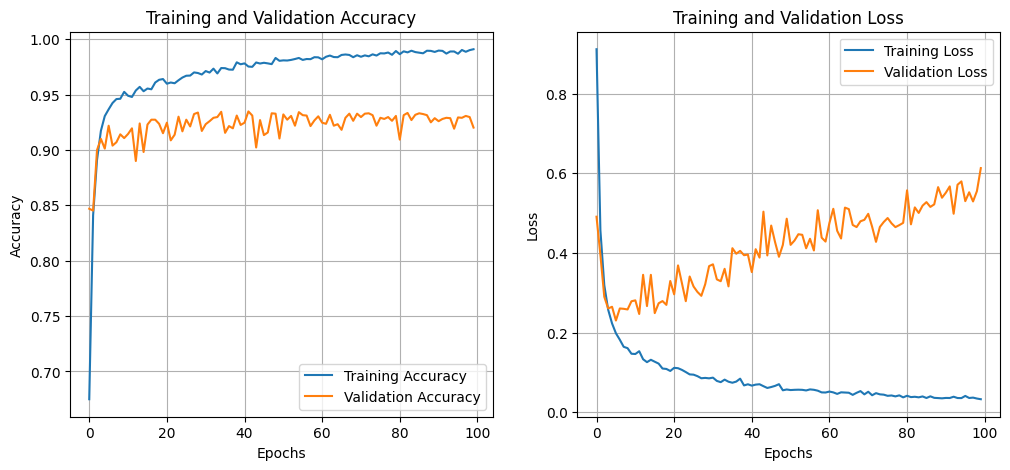

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history_1D_CNN.history["accuracy"], label="Training Accuracy")
plt.plot(history_1D_CNN.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_1D_CNN.history["loss"], label="Training Loss")
plt.plot(history_1D_CNN.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.9203
Precision: 0.9228
Recall: 0.9203
F1 Score: 0.9201


Text(0.5, 1.0, 'Confusion Matrix')

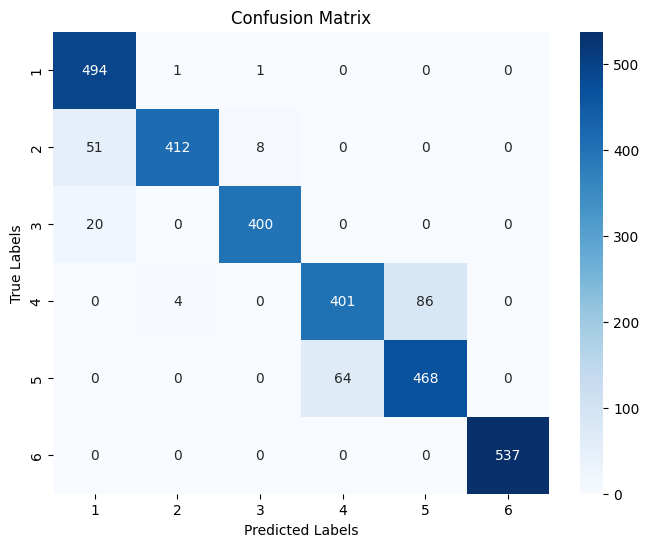

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = model_1D_CNN.predict(X_test)

y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')


In [23]:
model_1D_CNN.save("Health_1DCNN.h5")
print("Model Saved")

Model Saved


##LSTM

In [24]:
model_LSTM = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2])),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    LSTM(64, return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(32),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model_LSTM.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 1150, 32)            │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1150, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 575, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 575, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 573, 64)             │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 573, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 286, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 286, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 286, 64)             │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 286, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 286, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,046 (215.02 KB)

 Trainable params: 54,662 (213.52 KB)

 Non-trainable params: 384 (1.50 KB)

In [26]:
model_LSTM.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [27]:
history_LSTM = model_LSTM.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.4484 - loss: 1.3968 - val_accuracy: 0.2155 - val_loss: 2.1584
Epoch 2/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.6413 - loss: 0.8150 - val_accuracy: 0.3960 - val_loss: 2.1493
Epoch 3/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.6298 - loss: 0.8442 - val_accuracy: 0.6369 - val_loss: 0.8887
Epoch 4/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7197 - loss: 0.6112 - val_accuracy: 0.7516 - val_loss: 0.5365
Epoch 5/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7697 - loss: 0.4961 - val_accuracy: 0.7743 - val_loss: 0.5824
Epoch 6/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7858 - loss: 0.4536 - val_accuracy: 0.6970 - val_loss: 0.8962
Epoch 7/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7796 - loss: 0.4673 - val_accuracy: 0.7143 - val_loss: 0.7073
Epoch 8/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7666 - loss: 0.5272 -

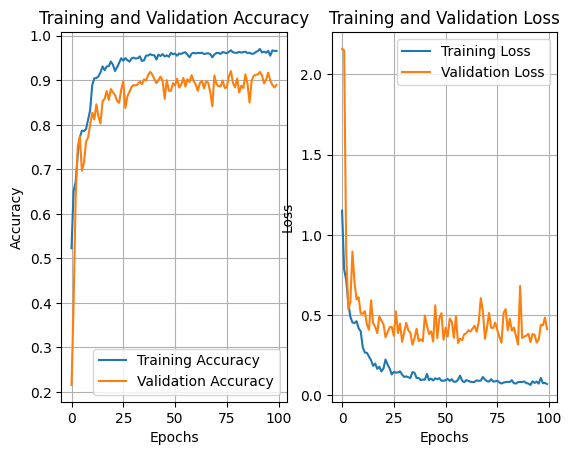

In [28]:
plt.subplot(1, 2, 1)
plt.plot(history_LSTM.history["accuracy"], label="Training Accuracy")
plt.plot(history_LSTM.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_LSTM.history["loss"], label="Training Loss")
plt.plot(history_LSTM.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Accuracy: 0.8894
Precision: 0.8912
Recall: 0.8894
F1 Score: 0.8889


Text(0.5, 1.0, 'Confusion Matrix')

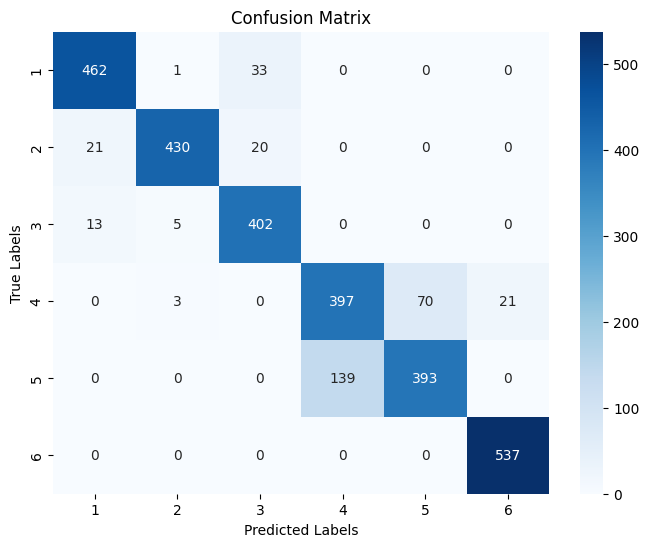

In [29]:
y_pred = model_LSTM.predict(X_test)

y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [53]:
model_LSTM.save("Health_LSTM.h5")
print("Model Saved")

Model Saved


##Bidirectional LSTM

In [31]:
model_Bi = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(X_train.shape[1],X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.3),

    Bidirectional(LSTM(64, return_sequences=False)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(y_train.shape[1], activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model_Bi.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 1152, 256)           │         133,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 1152, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1152, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 307,654 (1.17 MB)

 Trainable params: 306,886 (1.17 MB)

 Non-trainable params: 768 (3.00 KB)

In [33]:
model_Bi.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [34]:
history_Bi = model_Bi.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 59s 239ms/step - accuracy: 0.5074 - loss: 1.2399 - val_accuracy: 0.6233 - val_loss: 0.8612
Epoch 2/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 55s 237ms/step - accuracy: 0.6926 - loss: 0.7466 - val_accuracy: 0.7319 - val_loss: 0.6555
Epoch 3/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 55s 237ms/step - accuracy: 0.7804 - loss: 0.5650 - val_accuracy: 0.4326 - val_loss: 1.4468
Epoch 4/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 55s 237ms/step - accuracy: 0.7679 - loss: 0.5881 - val_accuracy: 0.3950 - val_loss: 2.1534
Epoch 5/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 55s 237ms/step - accuracy: 0.7694 - loss: 0.5641 - val_accuracy: 0.6861 - val_loss: 0.7609
Epoch 6/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 55s 237ms/step - accuracy: 0.8070 - loss: 0.4754 - val_accuracy: 0.8124 - val_loss: 0.4356
Epoch 7/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 55s 237ms/step - accuracy: 0.8549 - loss: 0.3549 - val_accuracy: 0.8202 - val_loss: 0.4529
Epoch 8/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 54s 237ms/step - accuracy: 0.8815 -

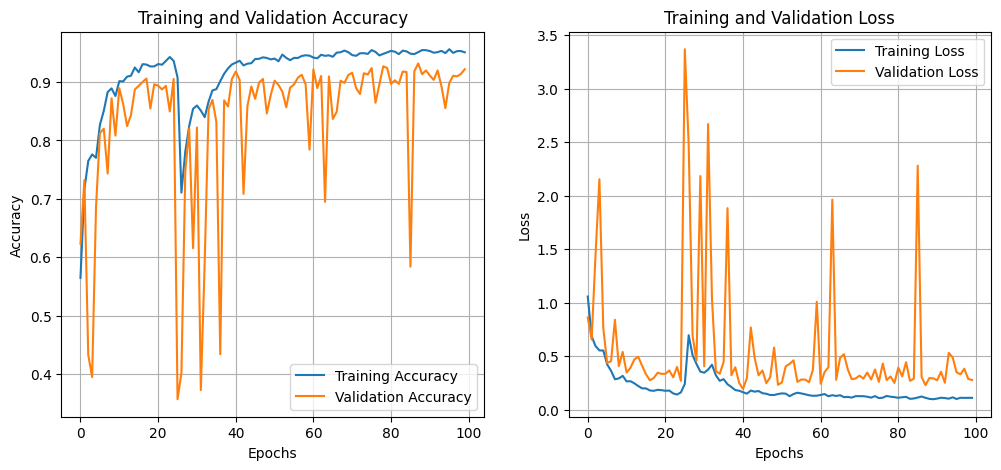

In [35]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history_Bi.history["accuracy"], label="Training Accuracy")
plt.plot(history_Bi.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_Bi.history["loss"], label="Training Loss")
plt.plot(history_Bi.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)


93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step
Accuracy: 0.9220
Precision: 0.9223
Recall: 0.9220
F1 Score: 0.9215


Text(0.5, 1.0, 'Confusion Matrix')

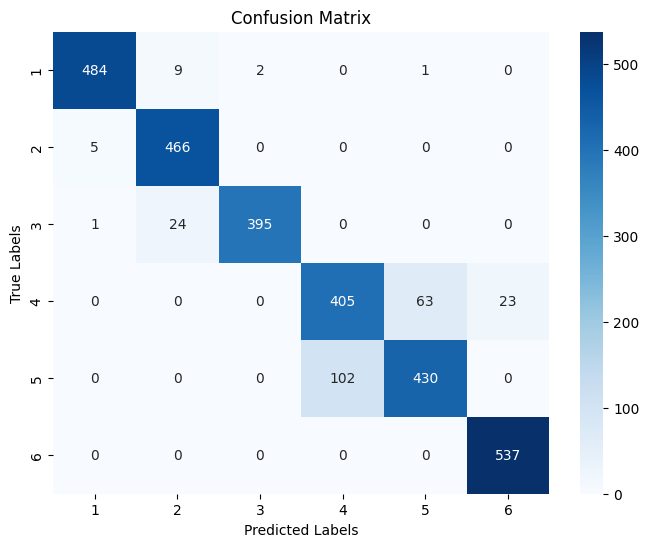

In [36]:
y_pred = model_Bi.predict(X_test)

y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [37]:
model_Bi.save("Health_Birectional_LSTM.h5")
print("Model Saved")

Model Saved


##CNN_LSTM

In [38]:
model_CL = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2])),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    LSTM(64, return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(32),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model_CL.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 1150, 32)            │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 1150, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 575, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 575, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 573, 64)             │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 573, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 286, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 286, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 286, 64)             │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 286, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 286, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,046 (215.02 KB)

 Trainable params: 54,662 (213.52 KB)

 Non-trainable params: 384 (1.50 KB)

In [40]:
model_CL.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [41]:
history_CL = model_CL.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.4278 - loss: 1.4385 - val_accuracy: 0.2301 - val_loss: 2.1953
Epoch 2/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.6275 - loss: 0.8622 - val_accuracy: 0.6899 - val_loss: 0.7439
Epoch 3/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7385 - loss: 0.5958 - val_accuracy: 0.7180 - val_loss: 0.8546
Epoch 4/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7619 - loss: 0.5342 - val_accuracy: 0.8035 - val_loss: 0.5187
Epoch 5/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.8409 - loss: 0.4180 - val_accuracy: 0.8307 - val_loss: 0.4810
Epoch 6/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.8724 - loss: 0.3460 - val_accuracy: 0.8504 - val_loss: 0.4660
Epoch 7/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.8818 - loss: 0.3106 - val_accuracy: 0.8612 - val_loss: 0.4287
Epoch 8/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9074 - loss: 0.2551 -

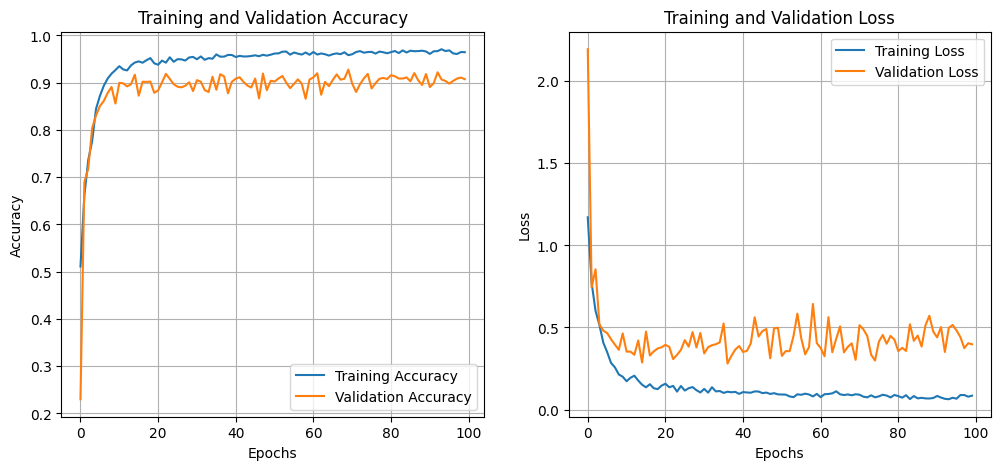

In [42]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history_CL.history["accuracy"], label="Training Accuracy")
plt.plot(history_CL.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_CL.history["loss"], label="Training Loss")
plt.plot(history_CL.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Accuracy: 0.9074
Precision: 0.9079
Recall: 0.9074
F1 Score: 0.9072


Text(0.5, 1.0, 'Confusion Matrix')

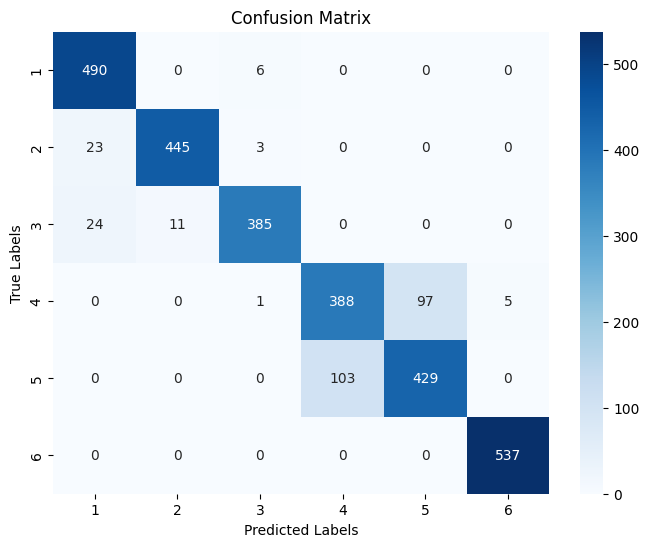

In [43]:
y_pred = model_CL.predict(X_test)

y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [44]:
model_CL.save("Health_CNN_LSTM.h5")
print("Model Saved")

Model Saved


#LSTM CNN

In [45]:
model_LC = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(32, return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),

    Conv1D(filters=64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
model_LC.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 1152, 64)            │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 1152, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 1152, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 1152, 32)            │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 1152, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 1152, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 1150, 64)            │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 1150, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 575, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 575, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 573, 32)             │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 573, 32)             │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 286, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 286, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │         585,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 628,646 (2.40 MB)

 Trainable params: 628,262 (2.40 MB)

 Non-trainable params: 384 (1.50 KB)

In [47]:
model_LC.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [48]:
history_LC = model_LC.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 29s 107ms/step - accuracy: 0.7375 - loss: 0.8188 - val_accuracy: 0.2871 - val_loss: 8.7551
Epoch 2/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 24s 106ms/step - accuracy: 0.9123 - loss: 0.2183 - val_accuracy: 0.6586 - val_loss: 3.1632
Epoch 3/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 24s 106ms/step - accuracy: 0.9357 - loss: 0.1548 - val_accuracy: 0.8212 - val_loss: 0.9216
Epoch 4/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 24s 106ms/step - accuracy: 0.9329 - loss: 0.1651 - val_accuracy: 0.9060 - val_loss: 0.4064
Epoch 5/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 24s 106ms/step - accuracy: 0.9479 - loss: 0.1346 - val_accuracy: 0.7153 - val_loss: 2.8995
Epoch 6/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 24s 106ms/step - accuracy: 0.9506 - loss: 0.1387 - val_accuracy: 0.9206 - val_loss: 0.2533
Epoch 7/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 24s 106ms/step - accuracy: 0.9540 - loss: 0.1082 - val_accuracy: 0.8850 - val_loss: 0.5591
Epoch 8/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 24s 106ms/step - accuracy: 0.9501 - loss: 0

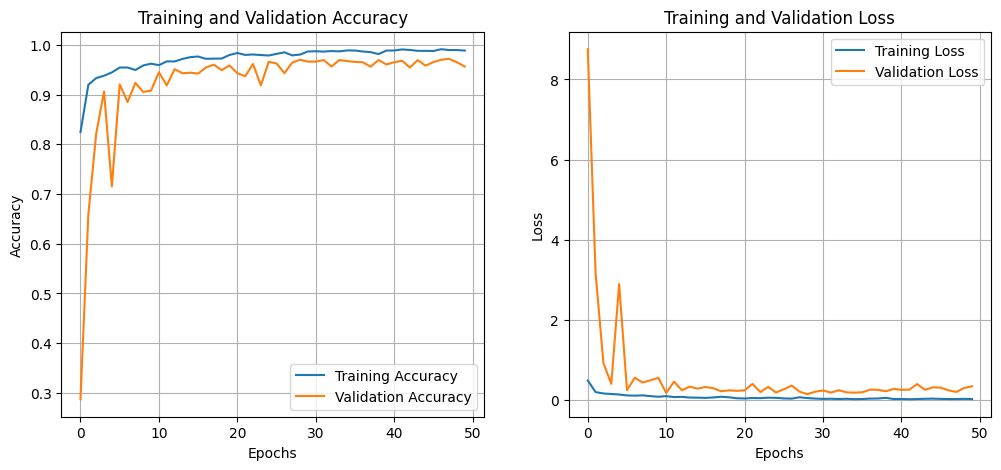

In [50]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history_LC.history["accuracy"], label="Training Accuracy")
plt.plot(history_LC.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_LC.history["loss"], label="Training Loss")
plt.plot(history_LC.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)


93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step
Accuracy: 0.9566
Precision: 0.9580
Recall: 0.9566
F1 Score: 0.9563


Text(0.5, 1.0, 'Confusion Matrix')

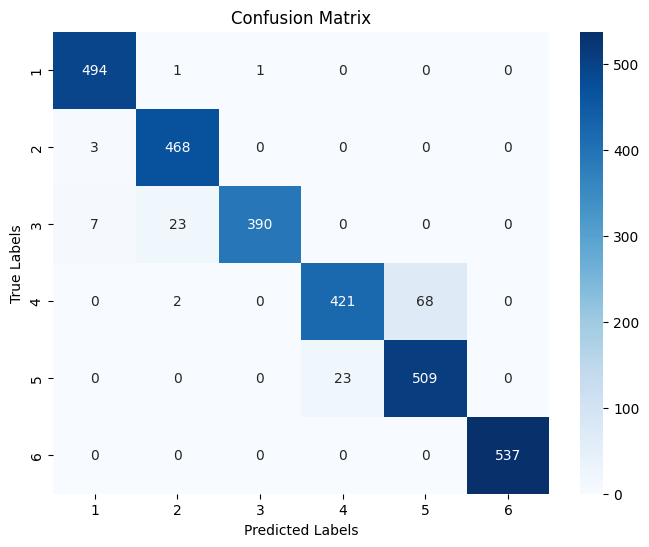

In [51]:
y_pred = model_LC.predict(X_test)

y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')


In [52]:
model_LC.save("Health_LSTM_CNN.h5")
print("Model Saved")

Model Saved


##CNN Transformers